# RDS Lab 7

Put this Jupyter notebook into the root directory of the DataSynthesizer downloaded from [GitHub](https://github.com/DataResponsibly/DataSynthesizer).

## Install DataSynthesizer

In [1]:
# Add the direcotry of DataSynthesizer into sys.path before importing the code
import os, sys
module_dir = os.getcwd() + '/DataSynthesizer/'
sys.path.append(module_dir)

print(f'Adding into sys.path: {module_dir}')

Adding into sys.path: /Users/hping/technion-files/DataSynthesizer-unstable/DataSynthesizer/


In [2]:
from DataDescriber import DataDescriber
from DataGenerator import DataGenerator
from ModelInspector import ModelInspector

In [3]:
describer = DataDescriber()
generator = DataGenerator()

## Modules and Parameters

In [4]:
from lib.utils import read_json_file

import json
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
sensitive_data_file = './data/adult_reduced.csv'
description_files = {'random mode':                   './out/description(random).json', 
                     'independent attribute mode':    './out/description(independent).json', 
                     'correlated attribute mode':     './out/description(correlated).json'}
synthetic_data_files = {'random mode':                './out/synthetic data(random).csv', 
                        'independent attribute mode': './out/synthetic data(independent).csv', 
                        'correlated attribute mode':  './out/synthetic data(correlated).csv'}


output_data_size = 1000

In [6]:
real_data = pd.read_csv(sensitive_data_file)
real_data.head()

,age,education,sex,relationship,marital-status,income
0,39,Bachelors,Male,Not-in-family,Never-married,<=50K
1,50,Bachelors,Male,Husband,Married-civ-spouse,<=50K
2,38,HS-grad,Male,Not-in-family,Divorced,<=50K
3,53,11th,Male,Husband,Married-civ-spouse,<=50K
4,28,Bachelors,Female,Wife,Married-civ-spouse,<=50K


## Random mode

In [7]:
describer.describe_dataset_in_random_mode(sensitive_data_file)

In [8]:
describer.save_dataset_description_to_file(description_files['random mode'])

#### Important parameters here

- __seed__: initialize the random number generator for both `random` and `np.random`
- __mininum__, __maxmimum__: hide the min/max informtion in the sensitive data 

In [9]:
generator.generate_dataset_in_random_mode(n=output_data_size, description_file=description_files['random mode'], seed=0, minimum=0, maximum=100)

In [10]:
generator.save_synthetic_data(synthetic_data_files['random mode'])

In [11]:
synthetic_random = pd.read_csv(synthetic_data_files['random mode'])

In [12]:
synthetic_random.head()

,age,education,sex,relationship,marital-status,income
0,44,Preschool,Male,Husband,Married-civ-spouse,<=50K
1,47,Some-college,Female,Husband,Separated,>50K
2,64,Assoc-acdm,Female,Not-in-family,Separated,<=50K
3,67,Masters,Male,Other-relative,Married-civ-spouse,<=50K
4,67,12th,Male,Own-child,Never-married,>50K


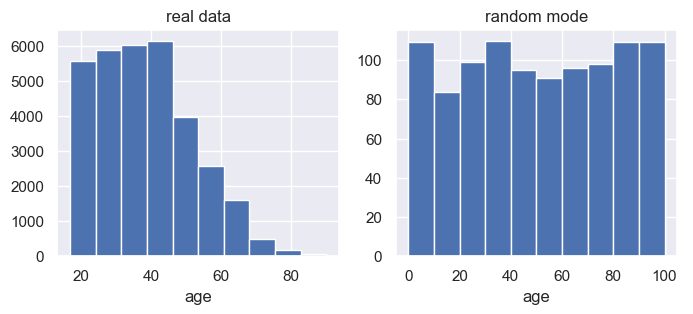

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(8,3), dpi=100)
axes[0].hist(real_data['age'])
axes[1].hist(synthetic_random['age'])
axes[0].set_xlabel('age')
axes[1].set_xlabel('age')
axes[0].set_title('real data')
axes[1].set_title('random mode');

In [14]:
relationship_real = real_data['relationship'].value_counts()
relationship_random = synthetic_random['relationship'].value_counts()
relationship_both = pd.merge(relationship_real, relationship_random, left_index=True, right_index=True, suffixes=('_real', '_random_mode'))
relationship_both

,relationship_real,relationship_random_mode
Husband,13193,156
Not-in-family,8305,159
Own-child,5068,189
Unmarried,3446,165
Wife,1568,166
Other-relative,981,165


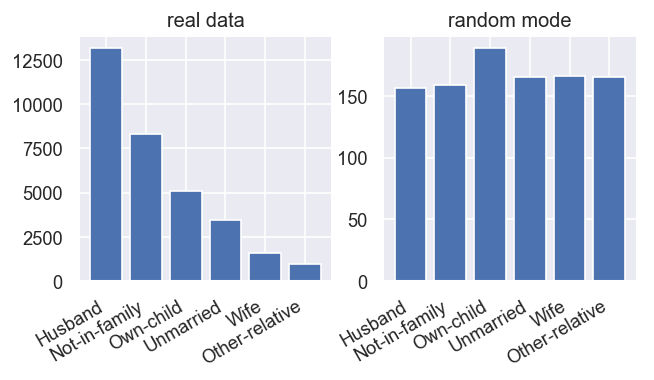

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(6,3), dpi=120)
axes[0].bar(relationship_both.index, relationship_both['relationship_real'])
axes[1].bar(relationship_both.index, relationship_both['relationship_random_mode'])
axes[0].set_title('real data')
axes[1].set_title('random mode')
fig.autofmt_xdate()

In [16]:
description_json = read_json_file(description_files['random mode'])

In [17]:
print(json.dumps(description_json['attribute_description']['relationship'], indent=4))

{
    "name": "relationship",
    "data_type": "String",
    "is_categorical": true,
    "is_candidate_key": false,
    "min": 4,
    "max": 14,
    "missing_rate": 0.0,
    "distribution_bins": [
        "Not-in-family",
        "Husband",
        "Wife",
        "Own-child",
        "Unmarried",
        "Other-relative"
    ],
    "distribution_probabilities": [
        0.16666666666666666,
        0.16666666666666666,
        0.16666666666666666,
        0.16666666666666666,
        0.16666666666666666,
        0.16666666666666666
    ]
}


## Independent attribute mode

In [18]:
describer.describe_dataset_in_independent_attribute_mode(sensitive_data_file, epsilon=0.1)

In [19]:
describer.save_dataset_description_to_file(description_files['independent attribute mode'])

In [20]:
generator.generate_dataset_in_independent_mode(n=output_data_size, description_file=description_files['independent attribute mode'], seed=0)

In [21]:
generator.save_synthetic_data(synthetic_data_files['independent attribute mode'])

In [22]:
synthetic_independent = pd.read_csv(synthetic_data_files['independent attribute mode'])

In [23]:
synthetic_independent.head()

,age,education,sex,relationship,marital-status,income
0,42.0,HS-grad,Male,Not-in-family,Married-civ-spouse,<=50K
1,45.0,10th,Male,Not-in-family,Married-civ-spouse,<=50K
2,40.0,HS-grad,Male,Own-child,Divorced,<=50K
3,36.0,HS-grad,Female,Unmarried,Married-civ-spouse,<=50K
4,33.0,11th,Male,Own-child,Divorced,<=50K


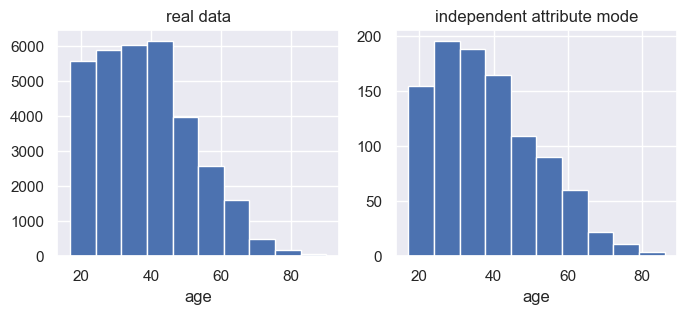

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(8,3), dpi=100)
axes[0].hist(real_data['age'])
axes[1].hist(synthetic_independent['age'])
axes[0].set_xlabel('age')
axes[1].set_xlabel('age')
axes[0].set_title('real data')
axes[1].set_title('independent attribute mode');

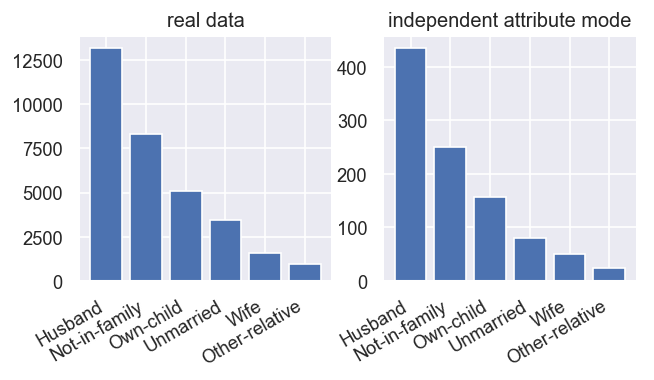

In [25]:
relationship_real = real_data['relationship'].value_counts()
relationship_independent = synthetic_independent['relationship'].value_counts()
relationship_both = pd.merge(relationship_real, relationship_independent, left_index=True, right_index=True, suffixes=('_real', '_independent_attribute_mode'))

fig, axes = plt.subplots(1, 2, figsize=(6,3), dpi=120)
axes[0].bar(relationship_both.index, relationship_both['relationship_real'])
axes[1].bar(relationship_both.index, relationship_both['relationship_independent_attribute_mode'])
axes[0].set_title('real data')
axes[1].set_title('independent attribute mode')
fig.autofmt_xdate()

## Correlated attribute mode

In [26]:
describer.describe_dataset_in_correlated_attribute_mode(sensitive_data_file, epsilon=0.1, k=2)

================ Constructing Bayesian Network (BN) ================
Adding ROOT sex
Adding attribute relationship
Adding attribute marital-status
Adding attribute age
Adding attribute income
Adding attribute education
========================== BN constructed ==========================


In [27]:
from lib.utils import display_bayesian_network

In [28]:
display_bayesian_network(describer.bayesian_network)

Constructed Bayesian network:
    relationship   has parents ['sex'].
    marital-status has parents ['relationship', 'sex'].
    age            has parents ['relationship', 'sex'].
    income         has parents ['marital-status', 'relationship'].
    education      has parents ['income', 'relationship'].


In [29]:
describer.save_dataset_description_to_file(description_files['correlated attribute mode'])

In [30]:
generator.generate_dataset_in_correlated_attribute_mode(n=output_data_size, description_file=description_files['correlated attribute mode'], seed=0)

In [31]:
generator.save_synthetic_data(synthetic_data_files['correlated attribute mode'])

In [32]:
synthetic_correlated = pd.read_csv(synthetic_data_files['correlated attribute mode'])

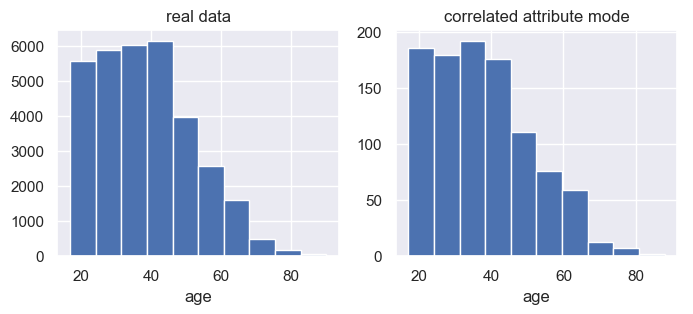

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(8,3), dpi=100)
axes[0].hist(real_data['age'])
axes[1].hist(synthetic_correlated['age'])
axes[0].set_xlabel('age')
axes[1].set_xlabel('age')
axes[0].set_title('real data')
axes[1].set_title('correlated attribute mode');

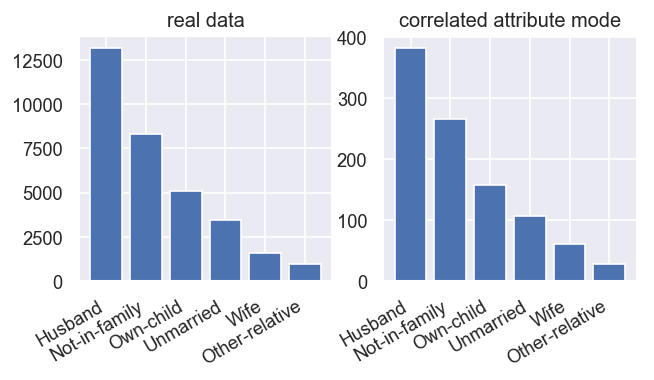

In [34]:
relationship_real = real_data['relationship'].value_counts()
relationship_correlated = synthetic_correlated['relationship'].value_counts()
relationship_both = pd.merge(relationship_real, relationship_correlated, left_index=True, right_index=True, suffixes=('_real', '_correlated_attribute_mode'))

fig, axes = plt.subplots(1, 2, figsize=(6,3), dpi=120)
axes[0].bar(relationship_both.index, relationship_both['relationship_real'])
axes[1].bar(relationship_both.index, relationship_both['relationship_correlated_attribute_mode'])
axes[0].set_title('real data')
axes[1].set_title('correlated attribute mode')
fig.autofmt_xdate()

In [35]:
from lib.utils import read_json_file

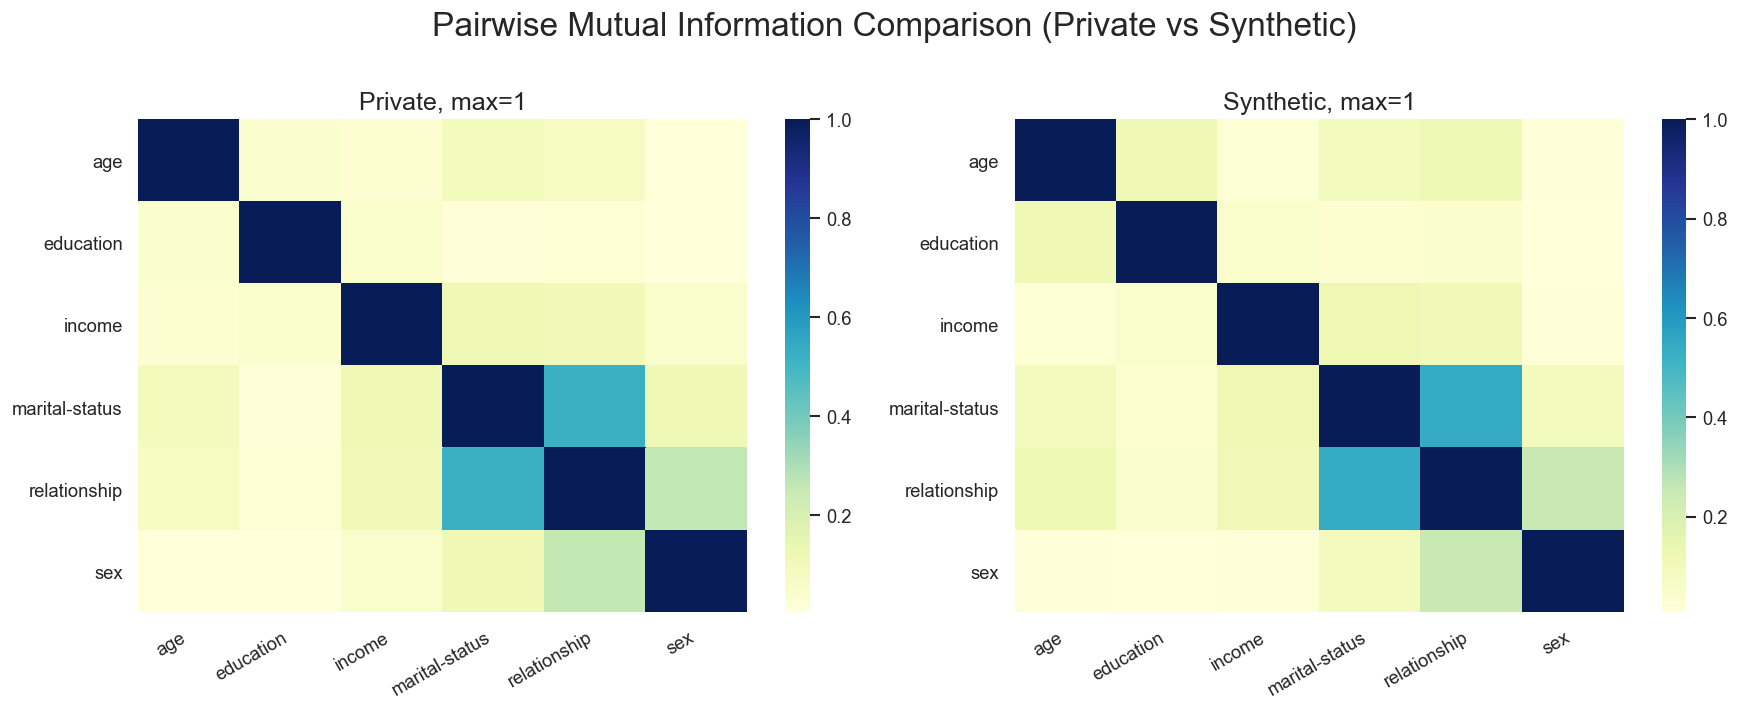

In [36]:
attribute_description = read_json_file(description_files['correlated attribute mode'])['attribute_description']
ModelInspector(real_data, synthetic_correlated, attribute_description).mutual_information_heatmap()

## Statistical measures

### Mutual information

In [37]:
from sklearn.metrics import normalized_mutual_info_score

In [38]:
normalized_mutual_info_score(real_data['marital-status'], real_data['relationship'], average_method='arithmetic')

0.5249037668258572

In [39]:
normalized_mutual_info_score(real_data['marital-status'], real_data['education'], average_method='arithmetic')

0.014483450445067415

## Two-sample Kolmogorov–Smirnov test

In [40]:
from scipy.stats import ks_2samp

In [41]:
ks_2samp?

Signature: ks_2samp(data1, data2)
Docstring:
Compute the Kolmogorov-Smirnov statistic on 2 samples.

This is a two-sided test for the null hypothesis that 2 independent samples
are drawn from the same continuous distribution.

Parameters
----------
data1, data2 : sequence of 1-D ndarrays
    two arrays of sample observations assumed to be drawn from a continuous
    distribution, sample sizes can be different

Returns
-------
statistic : float
    KS statistic
pvalue : float
    two-tailed p-value

Notes
-----
This tests whether 2 samples are drawn from the same distribution. Note
that, like in the case of the one-sample K-S test, the distribution is
assumed to be continuous.

This is the two-sided test, one-sided tests are not implemented.
The test uses the two-sided asymptotic Kolmogorov-Smirnov distribution.

If the K-S statistic is small or the p-value is high, then we cannot
reject the hypothesis that the distributions of the two samples
are the same.

Examples
--------
>>> from s

__Note__: In HW2, you can report only the statistic value, and ignore the p-value.

In [42]:
ks_2samp(real_data['age'], synthetic_random['age'])

Ks_2sampResult(statistic=0.33259405423666355, pvalue=2.1917953327374403e-94)

In [43]:
ks_2samp(real_data['age'], synthetic_independent['age'])

Ks_2sampResult(statistic=0.04653290746598687, pvalue=0.0289601647923856)

In [44]:
ks_2samp(real_data['age'], synthetic_correlated['age'])

Ks_2sampResult(statistic=0.035085869598599606, pvalue=0.17991991835758622)

## KL-divergence

In [45]:
from scipy.stats import entropy

In [46]:
entropy?

Signature: entropy(pk, qk=None, base=None)
Docstring:
Calculate the entropy of a distribution for given probability values.

If only probabilities `pk` are given, the entropy is calculated as
``S = -sum(pk * log(pk), axis=0)``.

If `qk` is not None, then compute the Kullback-Leibler divergence
``S = sum(pk * log(pk / qk), axis=0)``.

This routine will normalize `pk` and `qk` if they don't sum to 1.

Parameters
----------
pk : sequence
    Defines the (discrete) distribution. ``pk[i]`` is the (possibly
    unnormalized) probability of event ``i``.
qk : sequence, optional
    Sequence against which the relative entropy is computed. Should be in
    the same format as `pk`.
base : float, optional
    The logarithmic base to use, defaults to ``e`` (natural logarithm).

Returns
-------
S : float
    The calculated entropy.
File:      ~/miniconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py
Type:      function


In [47]:
def get_distribution_of_categorical_attribute(attribute: pd.Series, indicies=None):
    distribution = attribute.dropna().value_counts()
    if indicies is not None:
        for idx in set(indicies) - set(distribution.index):
            distribution.loc[idx] = 0
    distribution.sort_index(inplace=True)
    return distribution/sum(distribution)

def kl_divergence(df_in: pd.DataFrame, df_out: pd.DataFrame, attr: str):
    """
    df_in: the sensitive dataset
    df_out: the synthetic dataset
    attr: the attribute that will be calculated for KL-divergence.
    """
    distribution_in = get_distribution_of_categorical_attribute(df_in[attr])
    distribution_out = get_distribution_of_categorical_attribute(df_out[attr], df_in[attr].value_counts().index)
    return entropy(distribution_out, distribution_in)

In [48]:
kl_divergence(real_data, synthetic_random, 'relationship')

0.37194502301936416

In [49]:
kl_divergence(real_data, synthetic_independent, 'relationship')

0.004852757128718812

In [50]:
kl_divergence(real_data, synthetic_correlated, 'relationship')

0.0025684740409888974